In [28]:
import numpy as np 
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Get the current working directory
cwd = os.getcwd()

# Get the parent directory of the current working directory
parent_dir = os.path.dirname(os.path.dirname(cwd))

# Get the path of the dataset folder
dataset_dir = os.path.join(parent_dir, 'Data Set')


# Get the path of the cicids inside data set folder
cicids_dir = os.path.join(dataset_dir, 'CICIDS')

# Construct the relative path to the CSV file dataset
DATASET_PATH = os.path.join(cicids_dir, 'merged_cicids_2017.csv')

print(DATASET_PATH )

C:\6th_sem\Mini_project\Data Set\CICIDS\merged_cicids_2017.csv


In [6]:
# ,nrows=10000, header=0
df=pd.read_csv(DATASET_PATH)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [7]:
df[' Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [8]:
df.shape

(2830743, 79)

In [9]:
df.duplicated().sum()

308381

In [10]:
df =  df.drop_duplicates(keep="first")

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(2522362, 79)

In [13]:
df.isnull().sum().sort_values(ascending = False)

Flow Bytes/s             353
 Destination Port          0
 Bwd Avg Bytes/Bulk        0
 Fwd Avg Packets/Bulk      0
Fwd Avg Bytes/Bulk         0
                        ... 
 Bwd IAT Mean              0
Bwd IAT Total              0
 Fwd IAT Min               0
 Fwd IAT Max               0
 Label                     0
Length: 79, dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum().sort_values(ascending = False)

 Destination Port        0
 ECE Flag Count          0
 Fwd Avg Packets/Bulk    0
Fwd Avg Bytes/Bulk       0
 Fwd Header Length.1     0
                        ..
Bwd IAT Total            0
 Fwd IAT Min             0
 Fwd IAT Max             0
 Fwd IAT Std             0
 Label                   0
Length: 79, dtype: int64

In [16]:
df.shape

(2522009, 79)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522009 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [18]:
print(df.max().to_string())

 Destination Port                          65535
 Flow Duration                         119999998
 Total Fwd Packets                        219759
 Total Backward Packets                   291922
Total Length of Fwd Packets             12900000
 Total Length of Bwd Packets           655453030
 Fwd Packet Length Max                     24820
 Fwd Packet Length Min                      2325
 Fwd Packet Length Mean              5940.857143
 Fwd Packet Length Std               7125.596846
Bwd Packet Length Max                      19530
 Bwd Packet Length Min                      2896
 Bwd Packet Length Mean                   5800.5
 Bwd Packet Length Std               8194.660487
Flow Bytes/s                                 inf
 Flow Packets/s                              inf
 Flow IAT Mean                       120000000.0
 Flow IAT Std                    84800261.566408
 Flow IAT Max                          120000000
 Flow IAT Min                          120000000
Fwd IAT Total       

Converting 'int64' and 'float64' to 'int32' and 'float32' to save memory

In [19]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522009 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int32  
 1    Flow Duration                int32  
 2    Total Fwd Packets            int32  
 3    Total Backward Packets       int32  
 4   Total Length of Fwd Packets   int32  
 5    Total Length of Bwd Packets  int32  
 6    Fwd Packet Length Max        int32  
 7    Fwd Packet Length Min        int32  
 8    Fwd Packet Length Mean       float32
 9    Fwd Packet Length Std        float32
 10  Bwd Packet Length Max         int32  
 11   Bwd Packet Length Min        int32  
 12   Bwd Packet Length Mean       float32
 13   Bwd Packet Length Std        float32
 14  Flow Bytes/s                  float32
 15   Flow Packets/s               float32
 16   Flow IAT Mean                float32
 17   Flow IAT Std                 float32
 18   Flow IAT Max         

In [20]:
print(df.max().to_string())

 Destination Port                          65535
 Flow Duration                         119999998
 Total Fwd Packets                        219759
 Total Backward Packets                   291922
Total Length of Fwd Packets             12900000
 Total Length of Bwd Packets           655453030
 Fwd Packet Length Max                     24820
 Fwd Packet Length Min                      2325
 Fwd Packet Length Mean              5940.856934
 Fwd Packet Length Std                7125.59668
Bwd Packet Length Max                      19530
 Bwd Packet Length Min                      2896
 Bwd Packet Length Mean                   5800.5
 Bwd Packet Length Std               8194.660156
Flow Bytes/s                                 inf
 Flow Packets/s                              inf
 Flow IAT Mean                       120000000.0
 Flow IAT Std                         84800264.0
 Flow IAT Max                          120000000
 Flow IAT Min                          120000000
Fwd IAT Total       

In [21]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df.reset_index(drop=True,inplace=True)

In [22]:
print(df.max().to_string())

 Destination Port                          65535
 Flow Duration                         119999998
 Total Fwd Packets                        219759
 Total Backward Packets                   291922
Total Length of Fwd Packets             12900000
 Total Length of Bwd Packets           655453030
 Fwd Packet Length Max                     24820
 Fwd Packet Length Min                      2325
 Fwd Packet Length Mean              5940.856934
 Fwd Packet Length Std                7125.59668
Bwd Packet Length Max                      19530
 Bwd Packet Length Min                      2896
 Bwd Packet Length Mean                   5800.5
 Bwd Packet Length Std               8194.660156
Flow Bytes/s                        2071000064.0
 Flow Packets/s                        4000000.0
 Flow IAT Mean                       120000000.0
 Flow IAT Std                         84800264.0
 Flow IAT Max                          120000000
 Flow IAT Min                          120000000
Fwd IAT Total       

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520798 entries, 0 to 2520797
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int32  
 1    Flow Duration                int32  
 2    Total Fwd Packets            int32  
 3    Total Backward Packets       int32  
 4   Total Length of Fwd Packets   int32  
 5    Total Length of Bwd Packets  int32  
 6    Fwd Packet Length Max        int32  
 7    Fwd Packet Length Min        int32  
 8    Fwd Packet Length Mean       float32
 9    Fwd Packet Length Std        float32
 10  Bwd Packet Length Max         int32  
 11   Bwd Packet Length Min        int32  
 12   Bwd Packet Length Mean       float32
 13   Bwd Packet Length Std        float32
 14  Flow Bytes/s                  float32
 15   Flow Packets/s               float32
 16   Flow IAT Mean                float32
 17   Flow IAT Std                 float32
 18   Flow IAT Max         

In [24]:
df.shape

(2520798, 79)

In [34]:
# Count the number of instances for each class
class_counts = df[' Label'].value_counts()
print(class_counts)

BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64


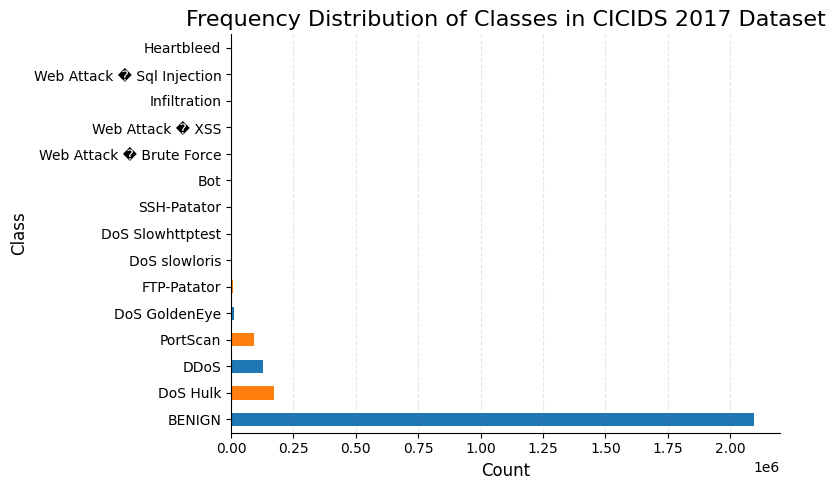

In [25]:
# Create a horizontal bar plot of the frequency distribution of classes
fig, ax = plt.subplots(figsize=(8, 5))
class_counts.plot(kind='barh', color=['#1f77b4', '#ff7f0e'])
ax.set_title('Frequency Distribution of Classes in CICIDS 2017 Dataset', fontsize=16)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Class', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(True, linestyle='--', color='gray', alpha=0.2)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

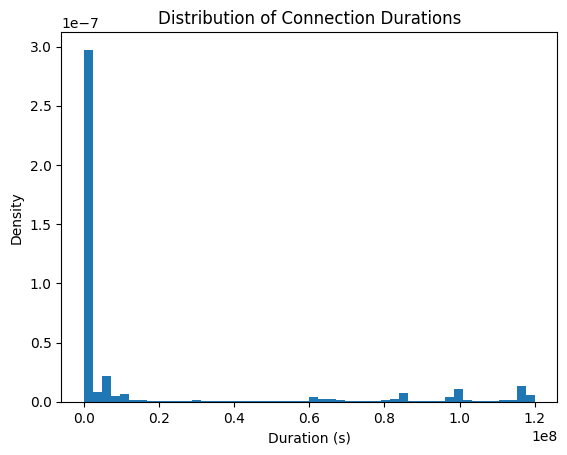

In [26]:
# Create a histogram of the duration of network connections
fig, ax = plt.subplots()
ax.hist(df[' Flow Duration'], bins=50, density=True)
ax.set_xlabel('Duration (s)')
ax.set_ylabel('Density')
ax.set_title('Distribution of Connection Durations')
plt.show()

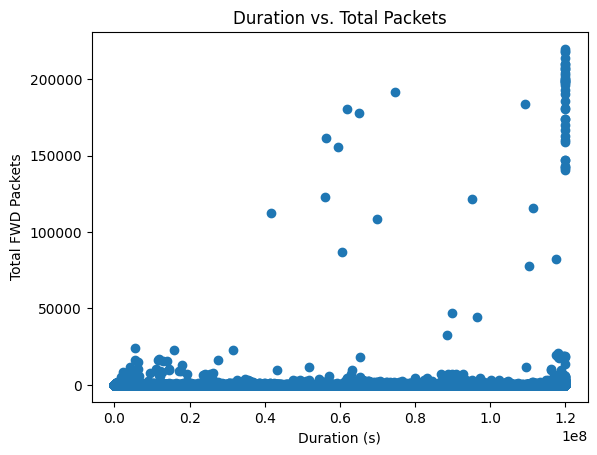

In [27]:
# Create a scatter plot of the duration of connections vs. the number of packets sent
fig, ax = plt.subplots()
ax.scatter(df[' Flow Duration'], df[' Total Fwd Packets'])
ax.set_xlabel('Duration (s)')
ax.set_ylabel('Total FWD Packets')
ax.set_title('Duration vs. Total Packets')
plt.show()

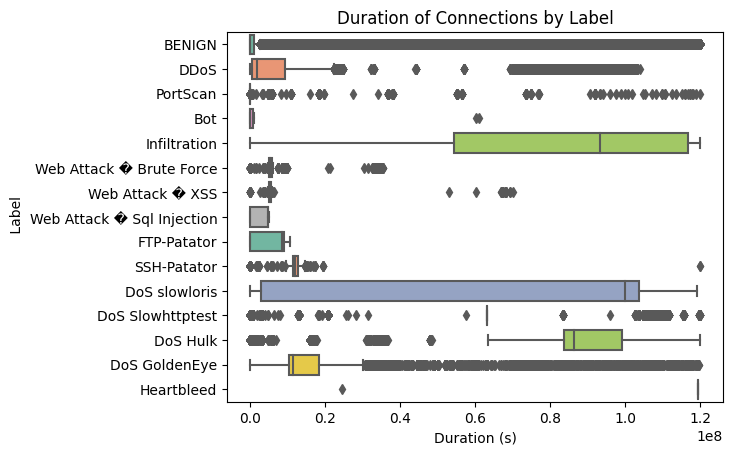

In [31]:
# Create a box plot of the duration of connections for each type of attack
fig, ax = plt.subplots()
sns.boxplot(x=' Flow Duration', y=' Label', data=df, palette='Set2')
ax.set_xlabel('Duration (s)')
ax.set_ylabel(' Label')
ax.set_title('Duration of Connections by Label')
plt.show()



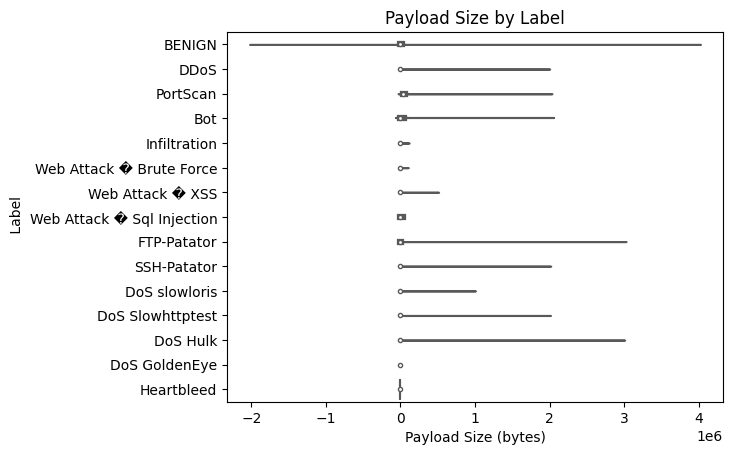

In [32]:
# Create a violin plot of the payload size for each type of attack
fig, ax = plt.subplots()
sns.violinplot(x=' Flow Packets/s', y=' Label', data=df, palette='Set2')
ax.set_xlabel('Payload Size (bytes)')
ax.set_ylabel(' Label')
ax.set_title('Payload Size by Label')
plt.show()

In [ ]:
#saving preprocesd dataset

df.to_csv('../Data Set/CICIDS/preprocesd_cicids.csv', index=False)